In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import clear_output
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

In [36]:
data = pd.read_csv('./bioresponse.csv')
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X = data.drop('Activity', axis=1)
y = data['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
def classificator_metrics(classificator):
    y_pred = classificator.predict(X_test)
    y_prob = classificator.predict_proba(X_test)[:, 1]  

    accuracy = classificator.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_prob)

    return [accuracy, precision, recall, F1_score, logloss]

### Неглибоке дерево

In [39]:
shallow_tree = DecisionTreeClassifier(max_depth=3)
shallow_tree.fit(X_train, y_train)
clear_output(wait=True)

### Глибоке дерево

In [40]:
deep_tree = DecisionTreeClassifier(max_depth=None) 
deep_tree.fit(X_train, y_train)
clear_output(wait=True)

### Випадковий ліс на неглибоких деревах

In [41]:
shallow_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
shallow_rf.fit(X_train, y_train)
clear_output(wait=True)

### Випадковий ліс на глибоких деревах

In [42]:
deep_rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
deep_rf.fit(X_train, y_train)
clear_output(wait=True)

In [43]:
results = []

classificator_list = [shallow_tree, deep_tree, shallow_rf, deep_rf]
classificator_names = ['Неглибоке дерево ', 'Глибоке дерево', 'Випадковий ліс на неглибоких деревах', 'Випадковий ліс на глибоких деревах']

for name, classificator in zip(classificator_names, classificator_list):
    results.append([name] + classificator_metrics(classificator))

classificators_result = pd.DataFrame(results, columns=['Класифікатор', 'Правильність', 'Точність', 'Повнота', 'F1-score', 'log-loss'])

classificators_result

,Класифікатор,Правильність,Точність,Повнота,F1-score,log-loss
0,Неглибоке дерево,0.767318,0.783410,0.808241,0.795632,0.531988
1,Глибоке дерево,0.695382,0.736066,0.711569,0.723610,10.521251
2,Випадковий ліс на неглибоких деревах,0.737123,0.764613,0.767036,0.765823,0.588013
3,Випадковий ліс на глибоких деревах,0.798401,0.831148,0.803487,0.817083,0.461226


In [44]:
classificators_result = classificators_result.round(3)
classificators_result.to_clipboard()

In [45]:
def plot_curves(X_test, y_test, classifiers, names):
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    
    for classificator, name in zip(classifiers, names):
        probs = classificator.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, probs)
        plt.plot(recall, precision, label=name)
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall крива')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    
    for classificator, name in zip(classifiers, names):
        probs = classificator.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('ROC крива')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


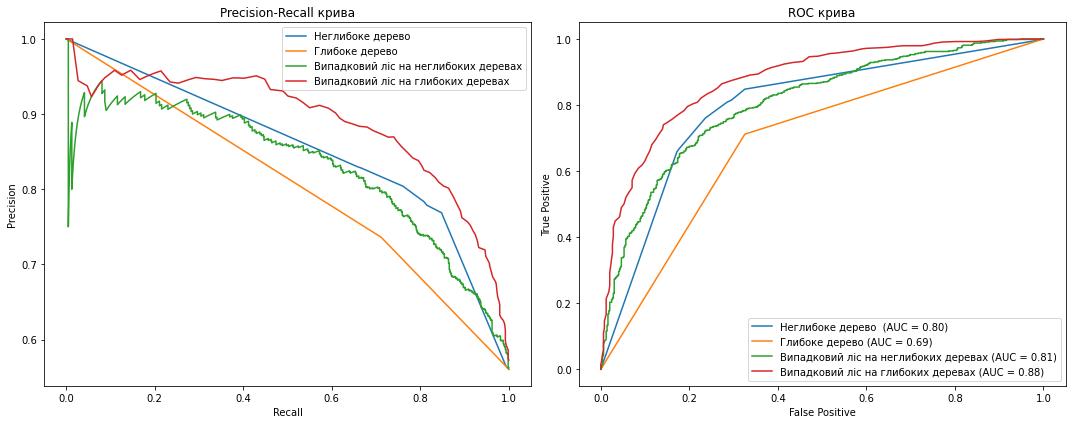

In [46]:
classificator_list = [shallow_tree, deep_tree, shallow_rf, deep_rf]
classificator_names = ['Неглибоке дерево ', 'Глибоке дерево', 'Випадковий ліс на неглибоких деревах', 'Випадковий ліс на глибоких деревах']

plot_curves(X_test, y_test, classificator_list, classificator_names)


## Уникнення помилок другого роду

### Перенавчання моделей

При застосуванні class_weight='balanced', неправильна класифікація зразка з класу меншості (часто позитивного класу) призведе до більшого штрафу, ніж неправильна класифікація зразка з класу більшості.

In [62]:
shallow_tree_avoid2 = DecisionTreeClassifier(class_weight='balanced',max_depth=3)
shallow_tree_avoid2.fit(X_train, y_train)
deep_tree_avoid2 = DecisionTreeClassifier(class_weight='balanced', max_depth=None) 
deep_tree_avoid2.fit(X_train, y_train)
shallow_rf_avoid2 = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=3, random_state=42)
shallow_rf_avoid2.fit(X_train, y_train)
deep_rf_avoid2 = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=None, random_state=42)
deep_rf_avoid2.fit(X_train, y_train)
clear_output(wait=True)

In [63]:
results = []

classificator_list = [shallow_tree, deep_tree, shallow_rf, deep_rf]
classificator_names = ['Неглибоке дерево ', 'Глибоке дерево', 'Випадковий ліс на неглибоких деревах', 'Випадковий ліс на глибоких деревах']

for name, classificator in zip(classificator_names, classificator_list):
    results.append([name] + classificator_metrics(classificator))

classificators_avoid2 = pd.DataFrame(results, columns=['Класифікатор', 'Правильність', 'Точність', 'Повнота', 'F1-score', 'log-loss'])

classificators_avoid2

,Класифікатор,Правильність,Точність,Повнота,F1-score,log-loss
0,Неглибоке дерево,0.767318,0.783410,0.808241,0.795632,0.531988
1,Глибоке дерево,0.695382,0.736066,0.711569,0.723610,10.521251
2,Випадковий ліс на неглибоких деревах,0.737123,0.764613,0.767036,0.765823,0.588013
3,Випадковий ліс на глибоких деревах,0.798401,0.831148,0.803487,0.817083,0.461226


In [66]:
classificators_avoid2 = classificators_avoid2.round(3)
classificators_avoid2.to_clipboard()

In [65]:
classificators_avoid2 > classificators_result 

,Класифікатор,Правильність,Точність,Повнота,F1-score,log-loss
0,False,True,True,True,False,False
1,False,True,True,False,False,True
2,False,True,False,True,False,True
3,False,True,True,True,True,True


### Встановлення порога

In [48]:
def classificator_metrics_new(classificator):
    y_prob = classificator.predict_proba(X_test)[:, 1]  
    threshold = 0.3  
    y_pred = (y_prob > threshold).astype(int)

    accuracy = classificator.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_prob)

    return [accuracy, precision, recall, F1_score, logloss]

In [49]:
results = []

classificator_list = [shallow_tree, deep_tree, shallow_rf, deep_rf]
classificator_names = ['Неглибоке дерево ', 'Глибоке дерево', 'Випадковий ліс на неглибоких деревах', 'Випадковий ліс на глибоких деревах']

for name, classificator in zip(classificator_names, classificator_list):
    results.append([name] + classificator_metrics_new(classificator))

classificators_threshold = pd.DataFrame(results, columns=['Класифікатор', 'Правильність', 'Точність', 'Повнота', 'F1-score', 'log-loss'])

classificators_threshold

,Класифікатор,Правильність,Точність,Повнота,F1-score,log-loss
0,Неглибоке дерево,0.767318,0.783410,0.808241,0.795632,0.531988
1,Глибоке дерево,0.695382,0.736066,0.711569,0.723610,10.521251
2,Випадковий ліс на неглибоких деревах,0.737123,0.561888,1.000000,0.719498,0.588013
3,Випадковий ліс на глибоких деревах,0.798401,0.696655,0.957211,0.806409,0.461226


In [57]:
classificators_threshold  > classificators_result

,Класифікатор,Правильність,Точність,Повнота,F1-score,log-loss
0,False,True,True,True,False,False
1,False,True,True,False,False,True
2,False,True,False,True,False,True
3,False,True,False,True,False,True


Для класифікаторів, які уникають помилки 2 типу, збільшилася повнота. В той же час зменшився F1-score

# Додаткові питання

Проаналізуйте якість алгоритму класифікації для алгоритму випадкового лісу на 5, 10, 25 і 50 деревах. Як змінюється точність розв’язку? Чому?

In [51]:
deep_rf_5 = RandomForestClassifier(n_estimators=5, max_depth=None, random_state=42)
deep_rf_5.fit(X_train, y_train)
deep_rf_10 = RandomForestClassifier(n_estimators=10, max_depth=None, random_state=42)
deep_rf_10.fit(X_train, y_train)
deep_rf_25 = RandomForestClassifier(n_estimators=25, max_depth=None, random_state=42)
deep_rf_25.fit(X_train, y_train)
deep_rf_50 = RandomForestClassifier(n_estimators=50, max_depth=None, random_state=42)
deep_rf_50.fit(X_train, y_train)
clear_output(wait=True)

In [52]:
results = []

forests_list = [deep_rf_5, deep_rf_10, deep_rf_25, deep_rf_50]
forests_names = ['Випадковий ліс на 5 глибоких деревах', 'Випадковий ліс на 10 глибоких деревах', \
                       'Випадковий ліс на 25 глибоких деревах', 'Випадковий ліс на 50 глибоких деревах']

for name, classificator in zip(forests_names, forests_list):
    results.append([name] + classificator_metrics(classificator))

forest_classificators = pd.DataFrame(results, columns=['Класифікатор', 'Правильність', 'Точність', 'Повнота', 'F1-score', 'log-loss'])

forest_classificators

,Класифікатор,Правильність,Точність,Повнота,F1-score,log-loss
0,Випадковий ліс на 5 глибоких деревах,0.746004,0.789916,0.744849,0.766721,1.462684
1,Випадковий ліс на 10 глибоких деревах,0.769982,0.832143,0.738510,0.782536,0.650169
2,Випадковий ліс на 25 глибоких деревах,0.780639,0.806709,0.800317,0.803500,0.522325
3,Випадковий ліс на 50 глибоких деревах,0.788632,0.829146,0.784469,0.806189,0.487060


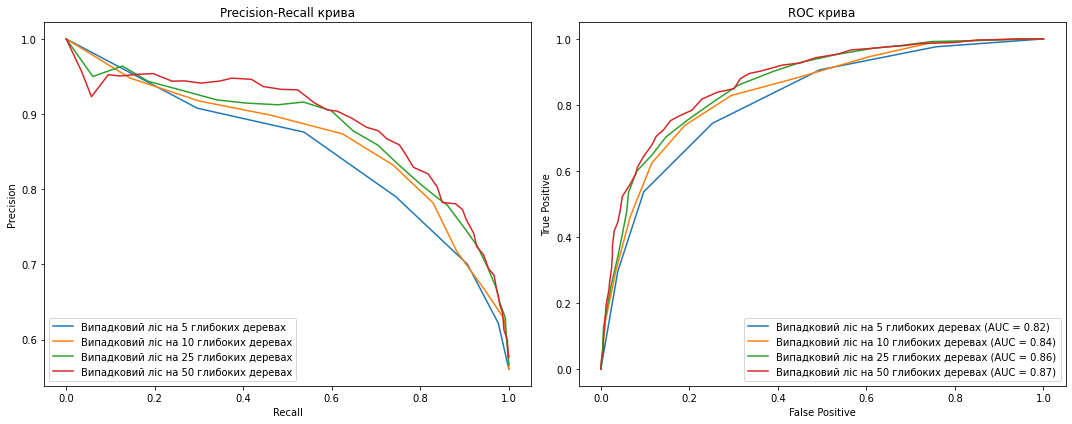

In [53]:
plot_curves(X_test, y_test, forests_list, forests_names)

Чим більше дерев має ліс, тим менший ризик перенавчання. Береться середнє арифметичне всіх наявних дерев, як наслідок краще узагальнюється рішення. Зменшується ризик відхилень через "шумні" або "упереджені" дерева. Більше дерев мають змогу краще ідентифікувати малопомітні закономірності.